## Setup

In [1]:
from IPython.display import clear_output

!pip install transformers
!pip install simpletransformers
!pip install wordcloud

clear_output()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Teknofest/NLP/teknofest_train_final.csv", sep="|")

## EDA

In [5]:
df

,id,text,is_offensive,target
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER
...,...,...,...,...
12612,71eedfa1-8fa6-425c-b982-258c3b29c003,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0,OTHER
12613,b38eed16-6501-4563-8b33-ff2e634bb8e5,yolda at kavga eden üç oğlan çocuğu görür,0,OTHER
12614,c8a051a8-94ef-4b64-a48e-54d0fa4f8323,sizin köpeklerinizin burnu bile daha iyi koku ...,0,OTHER
12615,513a7e6d-4207-4a16-9b47-972f26e23cfe,hayalleri gerçek etmek için birisinin delilik ...,0,OTHER


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12617 non-null  object
 1   text          12617 non-null  object
 2   is_offensive  12617 non-null  int64 
 3   target        12617 non-null  object
dtypes: int64(1), object(3)
memory usage: 394.4+ KB


In [7]:
len(df.id.unique())

12617

In [8]:
df.is_offensive.value_counts()

1    9018
0    3599
Name: is_offensive, dtype: int64

In [9]:
df.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [10]:
df.loc[df.is_offensive == 0, "target"].value_counts()

OTHER        3544
RACIST         18
SEXIST         13
PROFANITY      12
INSULT         12
Name: target, dtype: int64

In [11]:
df.loc[df.is_offensive == 1, "target"].value_counts()

INSULT       2407
PROFANITY    2386
SEXIST       2099
RACIST       2054
OTHER          72
Name: target, dtype: int64

In [12]:
for is_offensive in [0,1]:

  avg_word_count = df.loc[df.is_offensive == is_offensive, "text"].apply(lambda x: len(x.split())).mean()
  print(is_offensive, "avg word count: ", avg_word_count)

0 avg word count:  8.257571547652125
1 avg word count:  5.276003548458638


In [13]:
for target in df.target.unique().tolist():

  avg_word_count = df.loc[df.target == target, "text"].apply(lambda x: len(x.split())).mean()
  print(target, "avg word count: ", avg_word_count)

INSULT avg word count:  4.75155022736668
RACIST avg word count:  5.840733590733591
SEXIST avg word count:  5.520833333333333
PROFANITY avg word count:  5.01417848206839
OTHER avg word count:  8.301438053097344


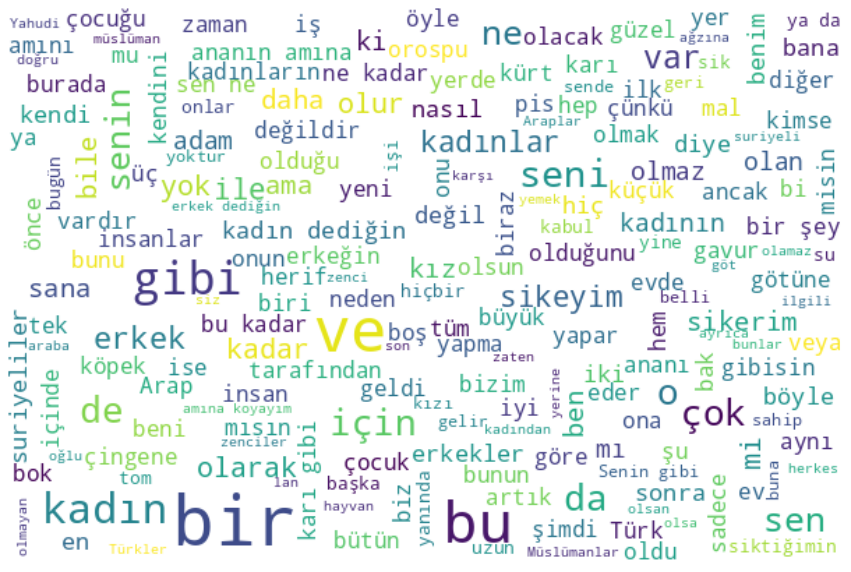

In [14]:
text = " ".join(txt for txt in df.text)

wordcloud = WordCloud(max_font_size=50, width=600, height=400, background_color="white").generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

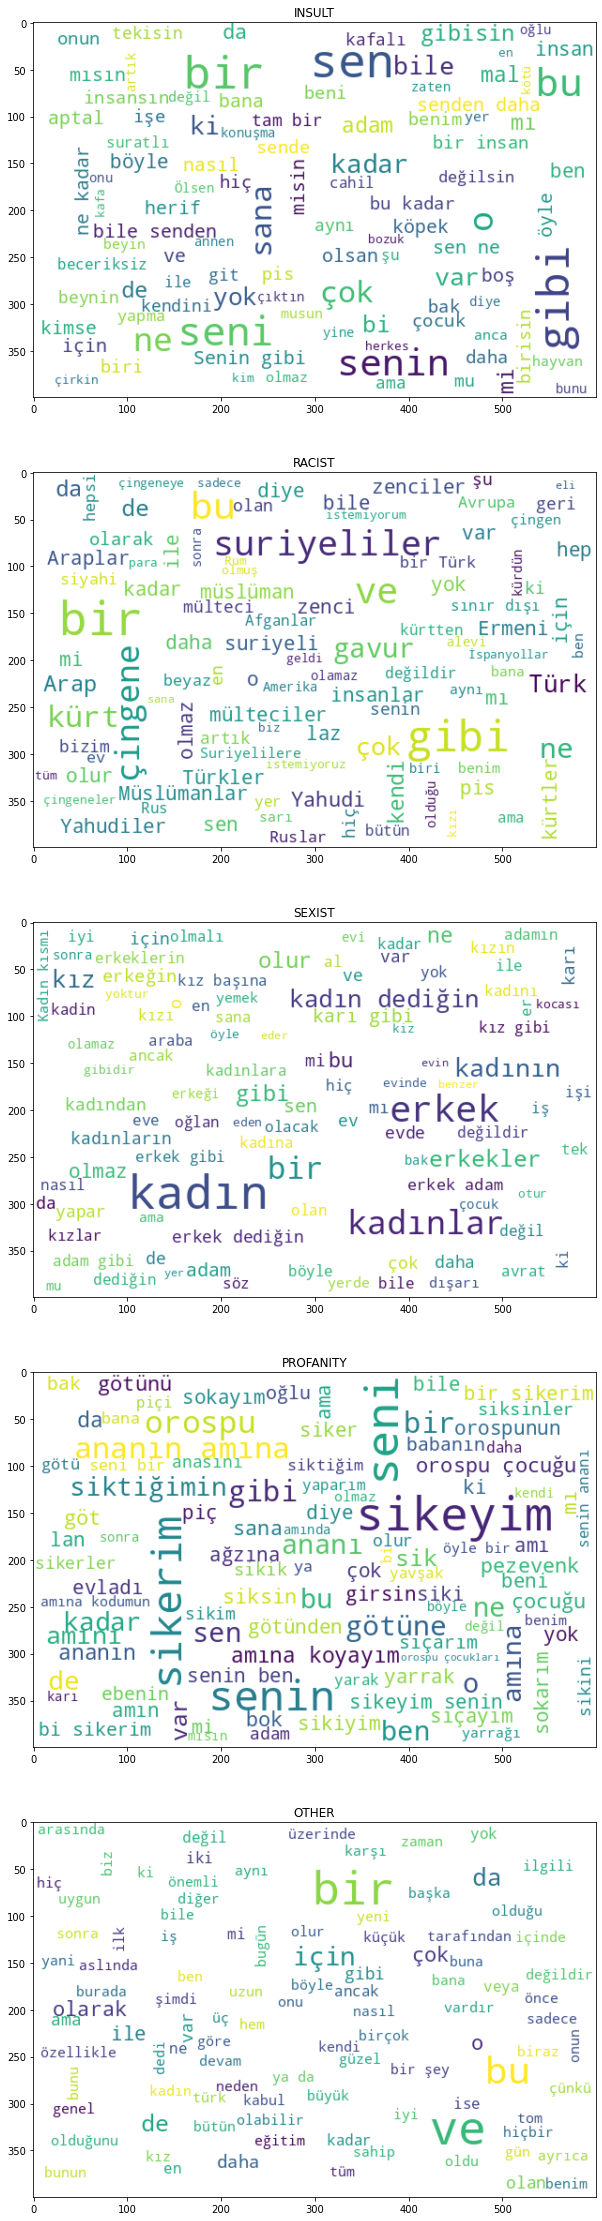

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(20,40))

for idx, target in enumerate(df.target.unique().tolist()):

  text = " ".join(txt for txt in df.loc[df.target == target, "text"])
  wordcloud = WordCloud(max_font_size=50, max_words=100, width=600, height=400, background_color="white").generate(text)

  axs[idx].imshow(wordcloud, interpolation='bilinear')
  axs[idx].set_title(target)

In [16]:
df.loc[df.text.apply(lambda x: len(x) == 0)]

,id,text,is_offensive,target


In [17]:
df.loc[df.text.apply(lambda x: len(x) == 1)]

,id,text,is_offensive,target
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST
...,...,...,...,...
12485,65ca945d-15af-4d59-8d7d-b731578e45d8,e,1,PROFANITY
12486,593b9691-8287-4400-bb22-ca2add665b9a,j,0,OTHER
12487,6d93aea2-8130-4168-81ea-bd8557ce3272,b,1,OTHER
12488,b89720e0-fdf3-44c8-ae20-14e8fe2d94af,h,0,OTHER


In [18]:
df.loc[df.text.apply(lambda x: len(x) == 2)]

,id,text,is_offensive,target


In [19]:
df.loc[df.text.apply(lambda x: len(x) == 3)]

,id,text,is_offensive,target


In [20]:
df.loc[df.text.apply(lambda x: len(x) == 4)]

,id,text,is_offensive,target


In [21]:
df.loc[df.text.apply(lambda x: len(x) == 5)]

,id,text,is_offensive,target
158,928b78c5-d30c-4abe-8670-f49cde0b8a8f,sokuk,1,PROFANITY


#### Drop rows that texts has 1 char

In [22]:
df = df.drop(df.loc[df.text.apply(lambda x: len(x) == 1)].index)

## Model

In [23]:
!pip install torchmetrics

clear_output()

In [24]:
from tqdm import tqdm

import torch
import torchmetrics
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, BertTokenizerFast, AdamW

In [25]:
df.drop(["id", "target"], axis=1, inplace=True)
df.rename(columns={"is_offensive": "labels"}, inplace=True)

train = df.loc[:10000].reset_index().drop("index", axis=1)
val = df.loc[10000:11000].reset_index().drop("index", axis=1)
test = df.loc[11000:].reset_index().drop("index", axis=1)

In [26]:
class CFG:
  model_path = "dbmdz/bert-base-turkish-cased"
  max_length = 300
  batch_size = 8
  device = "cuda"

In [27]:
tokenizer = BertTokenizerFast.from_pretrained(CFG.model_path)

In [28]:
train_encodings = tokenizer(train["text"].values.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val["text"].values.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test["text"].values.tolist(), truncation=True, padding=True)

In [29]:
class AcikHackDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        item = {
            key: torch.tensor(value[idx]) 
            for key, value in self.encodings.items()
            }
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [30]:
train_dataset = AcikHackDataset(train_encodings, train["labels"])
val_dataset = AcikHackDataset(val_encodings, val["labels"])
test_dataset = AcikHackDataset(test_encodings, test["labels"])

In [31]:
model = BertForSequenceClassification.from_pretrained(CFG.model_path)
model.to(CFG.device)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [32]:
train_dataloader = DataLoader(train_dataset, batch_size=CFG.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=CFG.batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=CFG.batch_size, shuffle=False)

In [33]:
optim = AdamW(model.parameters(), lr=5e-5)
loss_fn = torchmetrics.classification.BinaryF1Score(average="macro").to(CFG.device)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:
model.train()

for epoch in range(3):
    print("\n")
    print("Epoch", epoch)
    print("Train step")

    model.train ()
    for batch in tqdm(train_dataloader):
    
        input_ids = batch['input_ids'].to(CFG.device)
        attention_mask = batch['attention_mask'].to(CFG.device)
        labels = batch['labels'].to(CFG.device)

        outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels)

        optim.zero_grad()

        loss = outputs.loss
        loss.backward()

        optim.step()

    print("Val step")
    model.eval()
    with torch.inference_mode():
        for batch in tqdm(val_dataloader):

            input_ids = batch['input_ids'].to(CFG.device)
            attention_mask = batch['attention_mask'].to(CFG.device)
            labels = batch['labels'].to(CFG.device)

            outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels)

            logits = torch.argmax(outputs.logits, dim=-1)
            f1_score = loss_fn(logits, labels).item()

    print("\n")
    print("F1 Score:",loss_fn.compute().item())

    loss_fn.reset()



Epoch 0
Train step


100%|██████████| 1251/1251 [02:21<00:00,  8.82it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 48.96it/s]




F1 Score: 0.9701595902442932


Epoch 1
Train step


100%|██████████| 1251/1251 [02:11<00:00,  9.50it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 49.05it/s]




F1 Score: 0.9888734221458435


Epoch 2
Train step


100%|██████████| 1251/1251 [02:12<00:00,  9.48it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 49.44it/s]



F1 Score: 0.985567033290863


In [35]:
print("Test step")
model.eval()
with torch.inference_mode():
    for batch in tqdm(test_dataloader):

        input_ids = batch['input_ids'].to(CFG.device)
        attention_mask = batch['attention_mask'].to(CFG.device)
        labels = batch['labels'].to(CFG.device)

        outputs = model(input_ids=input_ids, 
                    attention_mask=attention_mask, 
                    labels=labels)

        logits = torch.argmax(outputs.logits, dim=-1)
        f1_score = loss_fn(logits, labels).item()

print("\n")
print("F1 Score:",loss_fn.compute().item())

Test step


100%|██████████| 184/184 [00:05<00:00, 32.85it/s]



F1 Score: 0.9408891201019287
